# Histogram2D Artist

In this example notebook, we show how to create a histogram 2D plot using the `Histogram2D` class. The `Histogram2D` class is a subclass of the `Artist` class.

It has a simplified interface for creating histogram 2D plots and updating some of its properties, like assigning different classes to underlying points and displaying bins/patches with different colors based on a categorical colormap.

It can be imported like shown below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from biaplotter.artists import Histogram2D

np.random.seed(2)

## Creating a Histogram 2D Plot

To create an empty histogram 2D plot, just instanciate the `Histogram2D` class and provide an axes object as an argument.

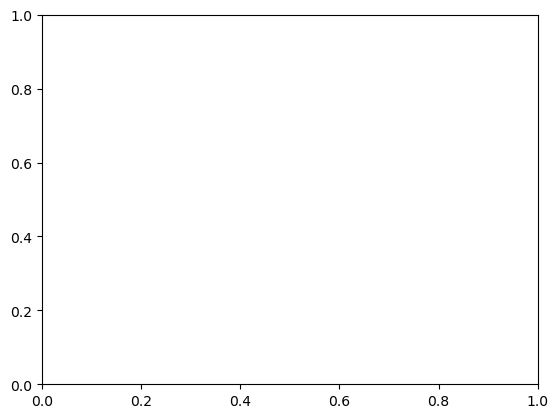

In [2]:
fig, ax = plt.subplots()
histogram = Histogram2D(ax)

## Adding Data to the Histogram 2D Artist

To add data to the histogram 2D plot, just feed the property `data` with a (N, 2) shaped numpy array. The plot gets updated automatically every time one of its properties is changed.

Below, we have a small function to generate 2 gaussian distributions with different means and standard deviations.

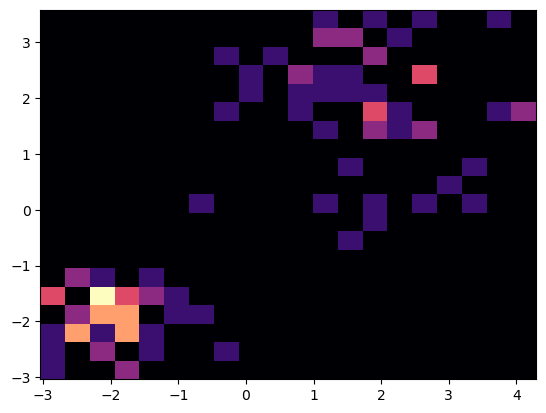

In [3]:
n_samples = 100

def generate_gaussian_data(n_samples):
    """Generate a 2D dataset with two Gaussian clusters."""
    # Gaussian 1
    x1 = np.random.normal(loc=2, scale=1, size=n_samples//2)
    y1 = np.random.normal(loc=2, scale=1, size=n_samples//2)
    # Gaussian 2
    x2 = np.random.normal(loc=-2, scale=0.5, size=n_samples//2)
    y2 = np.random.normal(loc=-2, scale=0.5, size=n_samples//2)
    x_data = np.concatenate([x1, x2])
    y_data = np.concatenate([y1, y2])
    return np.vstack([x_data, y_data]).T

data = generate_gaussian_data(n_samples)
histogram.data = data
fig # show the updated figure

## Assigning Classes to Data Points

The `Histogram2D` artist comes with a custom categorical colormap, which can be used to assign different classes to underlying points and display the bins/patches with the corresponding class color as an overlay.

You can access the histogram current categorical colormap via its private `_colormap` attribute.

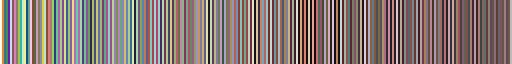

In [4]:
histogram.categorical_colormap

To assign classes to underlying points, just feed the property `color_indices` with a (N,) shaped numpy array containing integers. These integers will be used as indices to the colormap.

`Histogram2D` has a convenience method called `indices_in_above_threshold_patches`, which returns an array with the indices of the points that are inside the patches that are above a certain threshold.

Below, we get the indices of points that fall in patches that are above two thresholds and we color them with the first 2 non-transparent colors (`color_indices` `1` and `2`) of the histogram categorical colormap (color index `0` is transparent for the histogram).

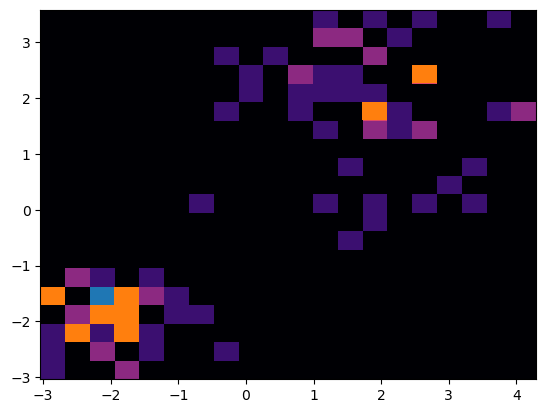

In [5]:
threshold_1 = 2
threshold_2 = 4

indices_in_patches_above_threshold_1 = histogram.indices_in_above_threshold_patches(threshold_1)
indices_in_patches_above_threshold_2 = histogram.indices_in_above_threshold_patches(threshold_2)

color_indices = np.zeros(n_samples, dtype=int)
color_indices[indices_in_patches_above_threshold_1] = 1
color_indices[indices_in_patches_above_threshold_2] = 2

histogram.color_indices = color_indices
fig

In [6]:
print("Histogram color_indices:\n", histogram.color_indices)

Histogram color_indices:
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 2 0 0 1 0 0 0 2 1 0 1 2 0 0 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 1 1 2 0 0 1 1 1 1 2 0 0 0 0 0 1 1 1]


Colors are kept if new data is added, but they may not make sense anymore.

For example, below, patches where data was previously colored received more data (with 'unlabelled' colors (color index 0)), thus many patches are transparent again (dominant color index is 0).

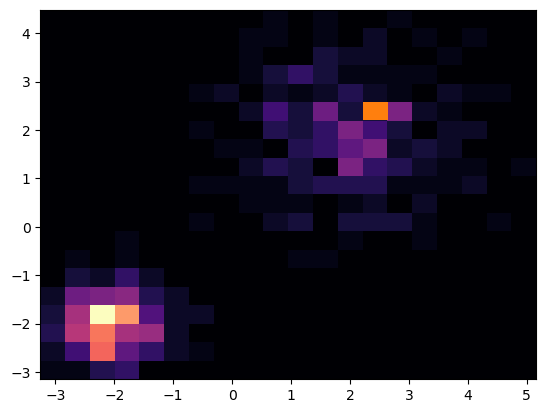

In [7]:
# Adding 400 more samples
n_samples = 400
data = np.concatenate([data, generate_gaussian_data(n_samples)])

histogram.data = data
fig

In [8]:
print("Histogram color_indices (up to 100th index):\n", histogram.color_indices[:100])

Histogram color_indices (up to 100th index):
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 2 0 0 1 0 0 0 2 1 0 1 2 0 0 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 1 1 2 0 0 1 1 1 1 2 0 0 0 0 0 1 1 1]


Set `color_indices` to `0` to reset the colors.

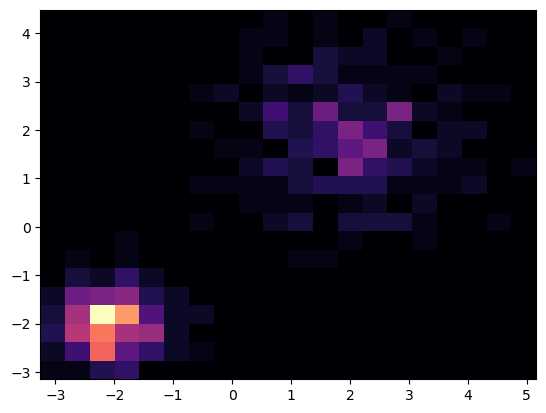

In [9]:
histogram.color_indices = 0
fig

## Changing Histogram Colormap

You can change the histogram colormap by setting the `histogram_colormap` attribute. Below, we show the default histogram colormap, which is `magma`.

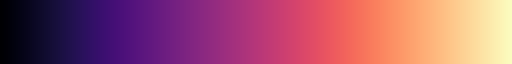

In [10]:
histogram.histogram_colormap

Here we display another colormap from matplotlib (`viridis`) and assign it to the histogram.

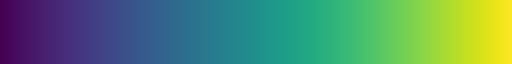

In [11]:
plt.cm.viridis

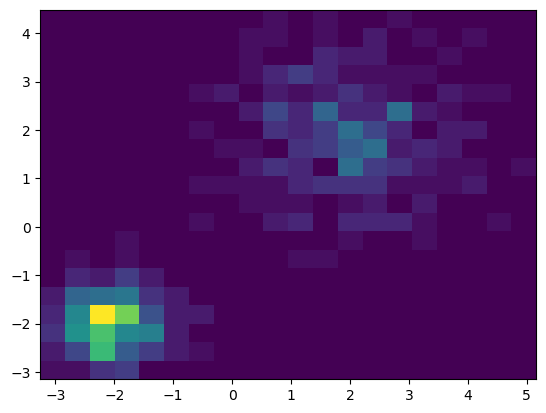

In [12]:
histogram.histogram_colormap = plt.cm.viridis
fig

## Changing Histogram Bins

You can set the number of bins in the histogram by setting the `bins` attribute. The default number of bins is 20.

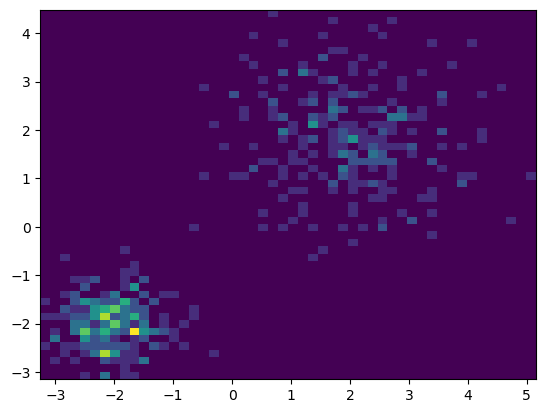

In [13]:
histogram.bins = 50
fig

## Histogram Visibility

Optionally, hide/show the artist by setting the `visible` attribute.

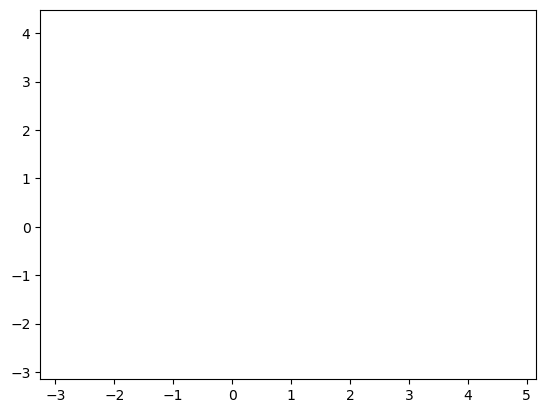

In [14]:
histogram.visible = False
fig

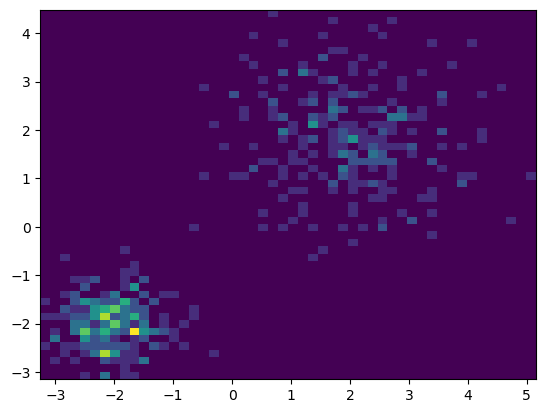

In [15]:
histogram.visible = True
fig